Column Name	Attribute/Target	Description
ID	N/A	Unique number to represent patient ID
PRG	Attribute1	Plasma glucose
PL	Attribute 2	Blood Work Result-1 (mu U/ml) -->  PL=platelet count is a lab test to measure how many platelets you have in your blood. Platelets are parts of the blood that helps the blood clot.
PR	Attribute 3	Blood Pressure (mm Hg)
SK	Attribute 4	Blood Work Result-2 (mm)
TS	Attribute 5	Blood Work Result-3 (mu U/ml)
M11	Attribute 6	Body mass index (weight in kg/(height in m)^2
BD2	Attribute 7	Blood Work Result-4 (mu U/ml)
Age	Attribute 8	patients age (years)
Insurance	N/A	If a patient holds a valid insurance card
                                 

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split as split
import warnings
from sys import modules
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_graphviz
warnings.filterwarnings('ignore')
%matplotlib inline

In [79]:
patients_test=pd.read_csv('C:\\Users\DannyC19\Desktop\Python\Regression\Paitients_Files_Test.csv')
patients_train=pd.read_csv('C:\\Users\DannyC19\Desktop\Python\Regression\Paitients_Files_Train.csv')


In [3]:
print(patients_test.shape)
patients_test.head()

(169, 10)


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [4]:
print(patients_train.shape)
patients_train.head()

(599, 11)


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [5]:
patients_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [6]:
patients_train.nunique()


ID           599
PRG           17
PL           129
PR            44
SK            51
TS           164
M11          233
BD2          437
Age           50
Insurance      2
Sepssis        2
dtype: int64

In [7]:
#identify missing values
print(patients_train.isnull().sum())

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64


In [8]:
patients_train.corr()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
PRG,1.000000,0.139541,0.116680,-0.080902,-0.054812,0.033482,-0.052230,0.532545,0.084631
PL,0.139541,1.000000,0.143064,0.054430,0.339818,0.215949,0.144665,0.274057,0.050993
PR,0.116680,0.143064,1.000000,0.197535,0.095281,0.269482,0.008318,0.225625,-0.025365
SK,-0.080902,0.054430,0.197535,1.000000,0.429068,0.377950,0.176592,-0.121553,-0.017360
TS,-0.054812,0.339818,0.095281,0.429068,1.000000,0.184747,0.218313,-0.011523,0.041560
M11,0.033482,0.215949,0.269482,0.377950,0.184747,1.000000,0.127675,0.046117,0.026826
BD2,-0.052230,0.144665,0.008318,0.176592,0.218313,0.127675,1.000000,0.033567,0.006114
Age,0.532545,0.274057,0.225625,-0.121553,-0.011523,0.046117,0.033567,1.000000,0.054368
Insurance,0.084631,0.050993,-0.025365,-0.017360,0.041560,0.026826,0.006114,0.054368,1.000000


In [16]:
patients_train.corr().loc['PRG'].abs().sort_values(ascending=False)

PRG          1.000000
Age          0.532545
PL           0.139541
PR           0.116680
Insurance    0.084631
SK           0.080902
TS           0.054812
BD2          0.052230
M11          0.033482
Name: PRG, dtype: float64

In [9]:
# there is a nice correlation between age and PRG ()

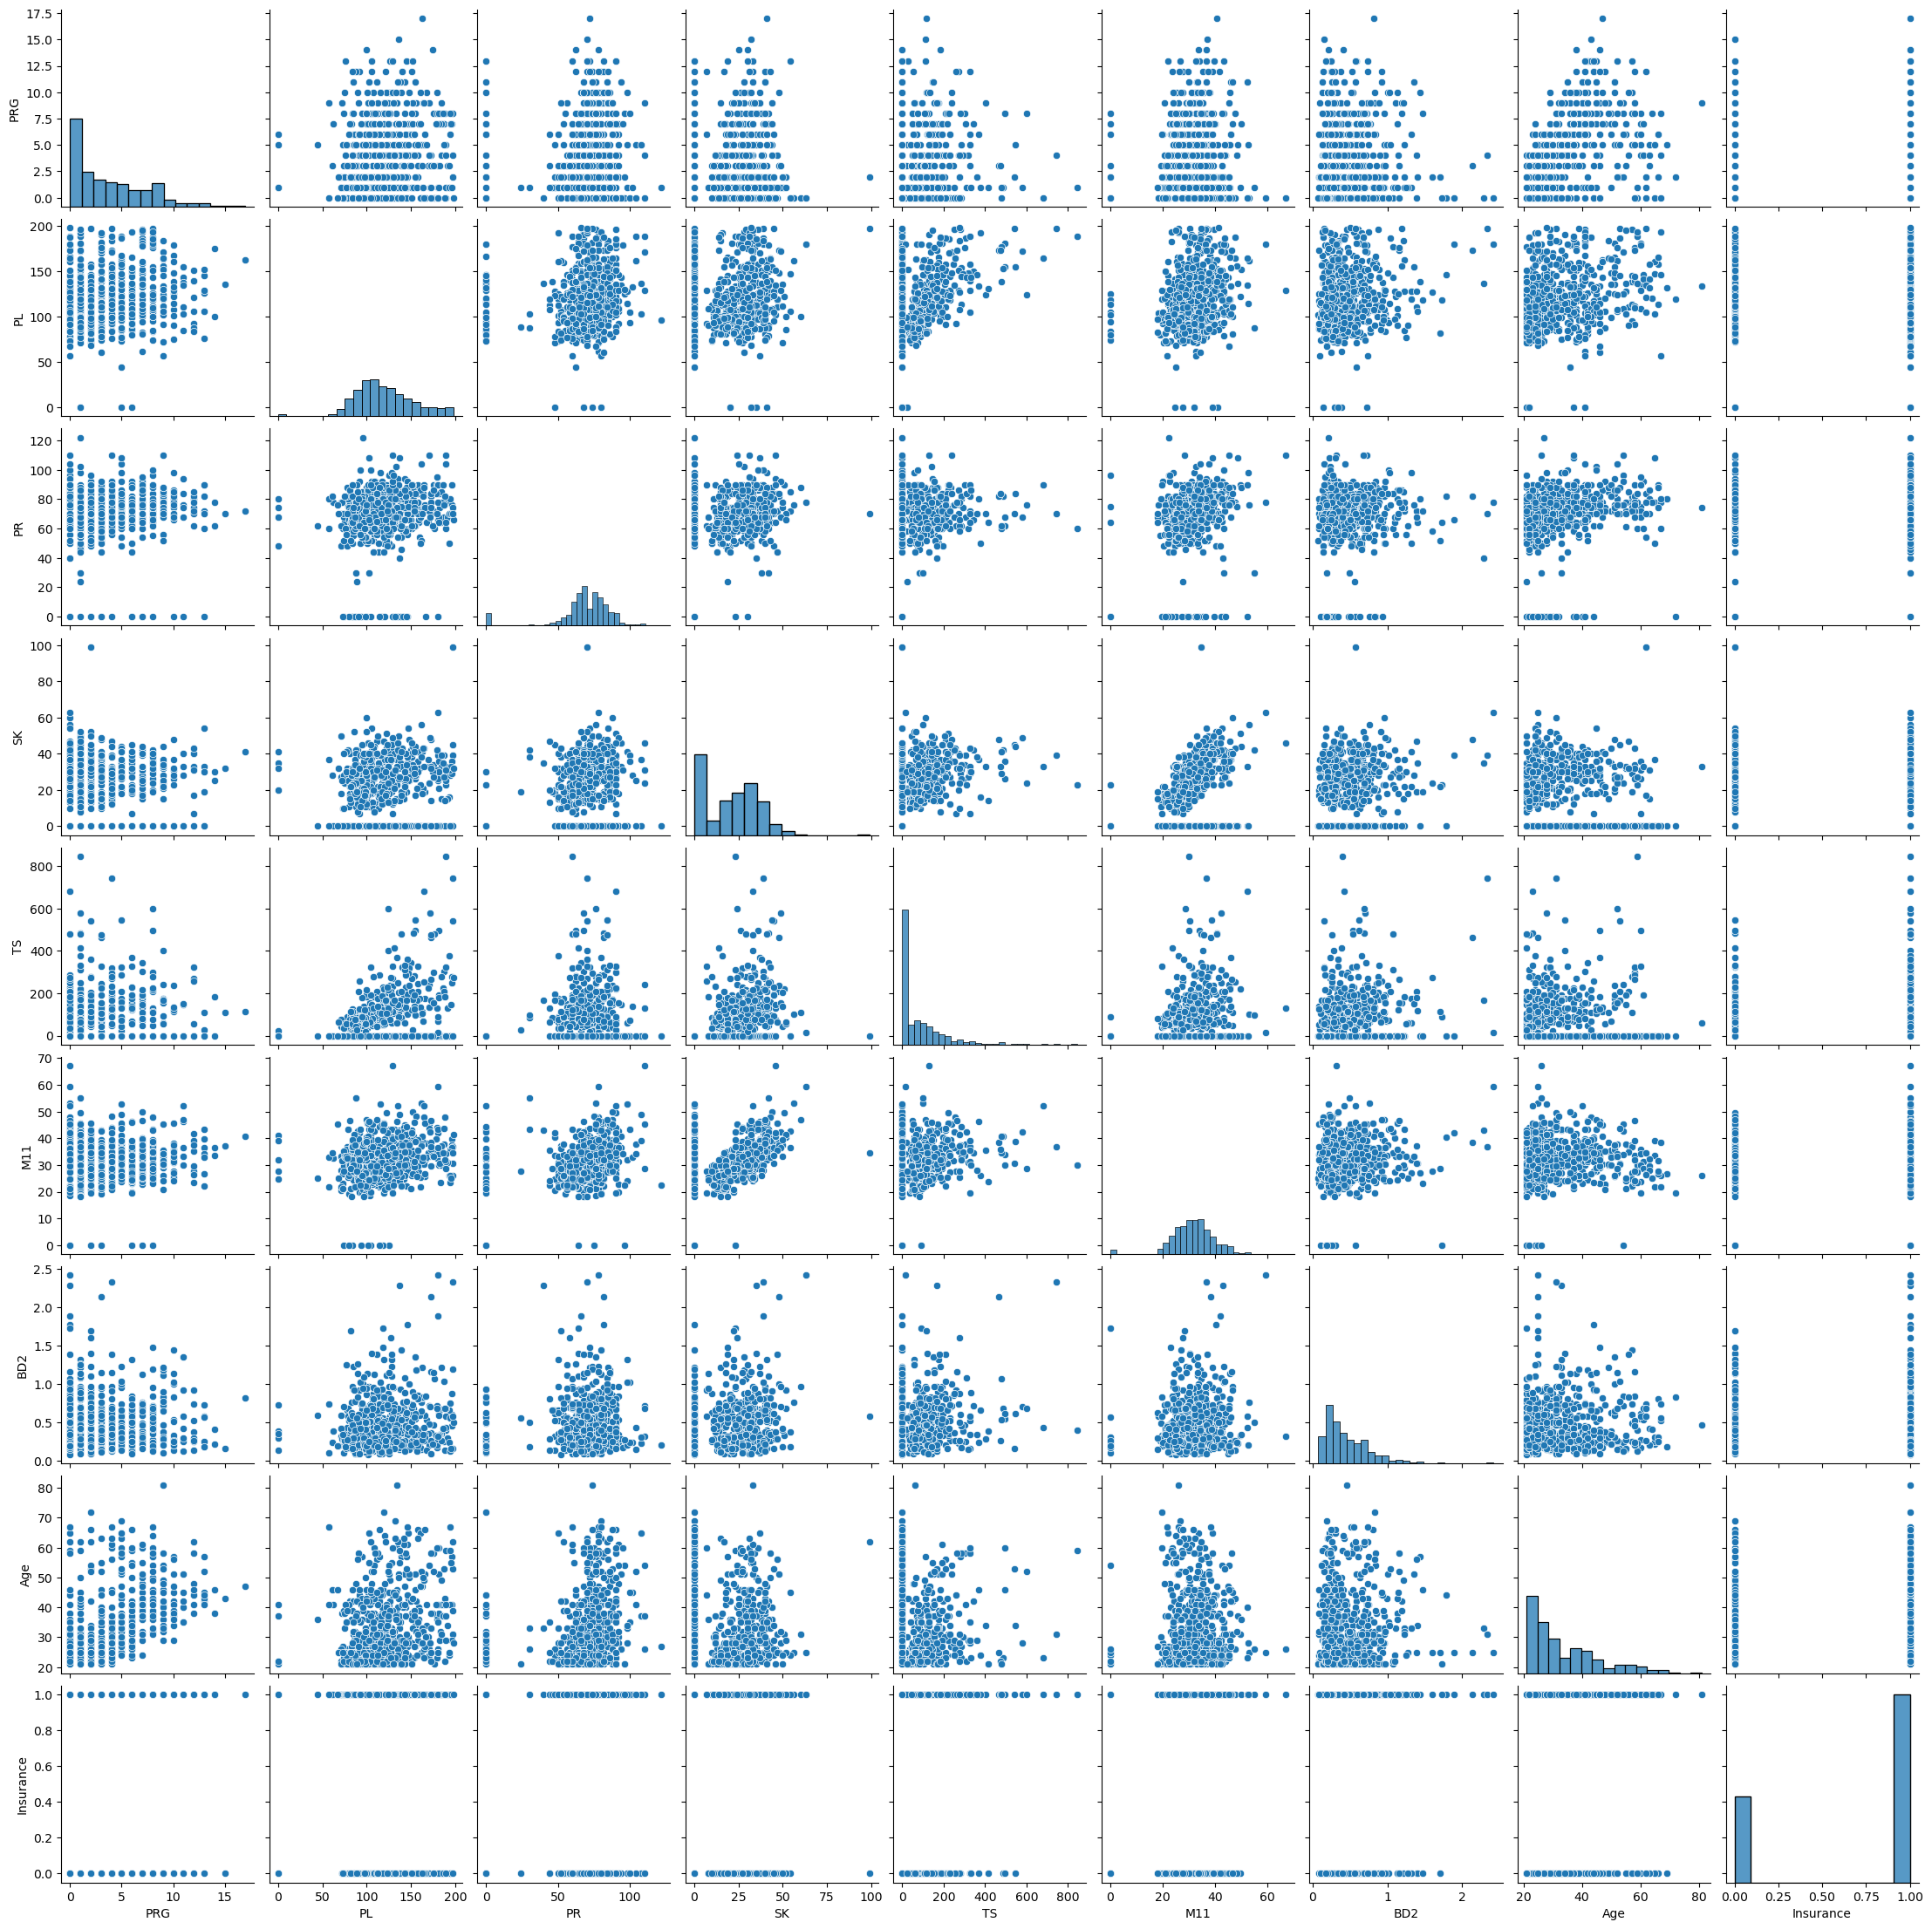

In [20]:
sns.pairplot(patients_train)

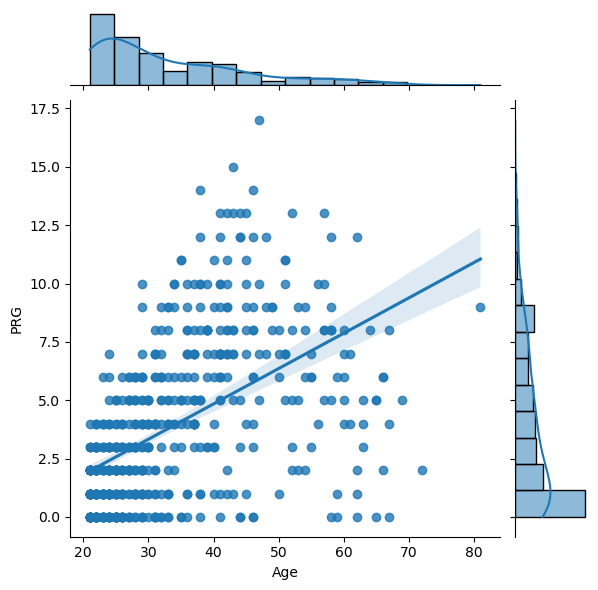

In [21]:
sns.jointplot(x='Age', y='PRG', data=patients_train, kind='reg');

In [10]:
patients_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


In [11]:
patients_test.nunique()

ID           169
PRG           14
PL            85
PR            33
SK            36
TS            66
M11          122
BD2          156
Age           39
Insurance      2
dtype: int64

In [12]:
#identify missing values
print(patients_test.isnull().sum())

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64


In [13]:
patients_test.corr()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
PRG,1.000000,0.088808,0.226032,-0.084315,-0.143327,-0.042980,0.041405,0.587779,0.000742
PL,0.088808,1.000000,0.184448,0.070199,0.296815,0.240396,0.119497,0.224456,-0.040125
PR,0.226032,0.184448,1.000000,0.243956,0.064700,0.327511,0.179641,0.292158,-0.134804
SK,-0.084315,0.070199,0.243956,1.000000,0.466503,0.450529,0.214038,-0.086018,-0.023332
TS,-0.143327,0.296815,0.064700,0.466503,1.000000,0.250437,0.051053,-0.159589,-0.114407
M11,-0.042980,0.240396,0.327511,0.450529,0.250437,1.000000,0.201224,-0.001741,-0.001815
BD2,0.041405,0.119497,0.179641,0.214038,0.051053,0.201224,1.000000,0.031738,0.094673
Age,0.587779,0.224456,0.292158,-0.086018,-0.159589,-0.001741,0.031738,1.000000,-0.013863
Insurance,0.000742,-0.040125,-0.134804,-0.023332,-0.114407,-0.001815,0.094673,-0.013863,1.000000


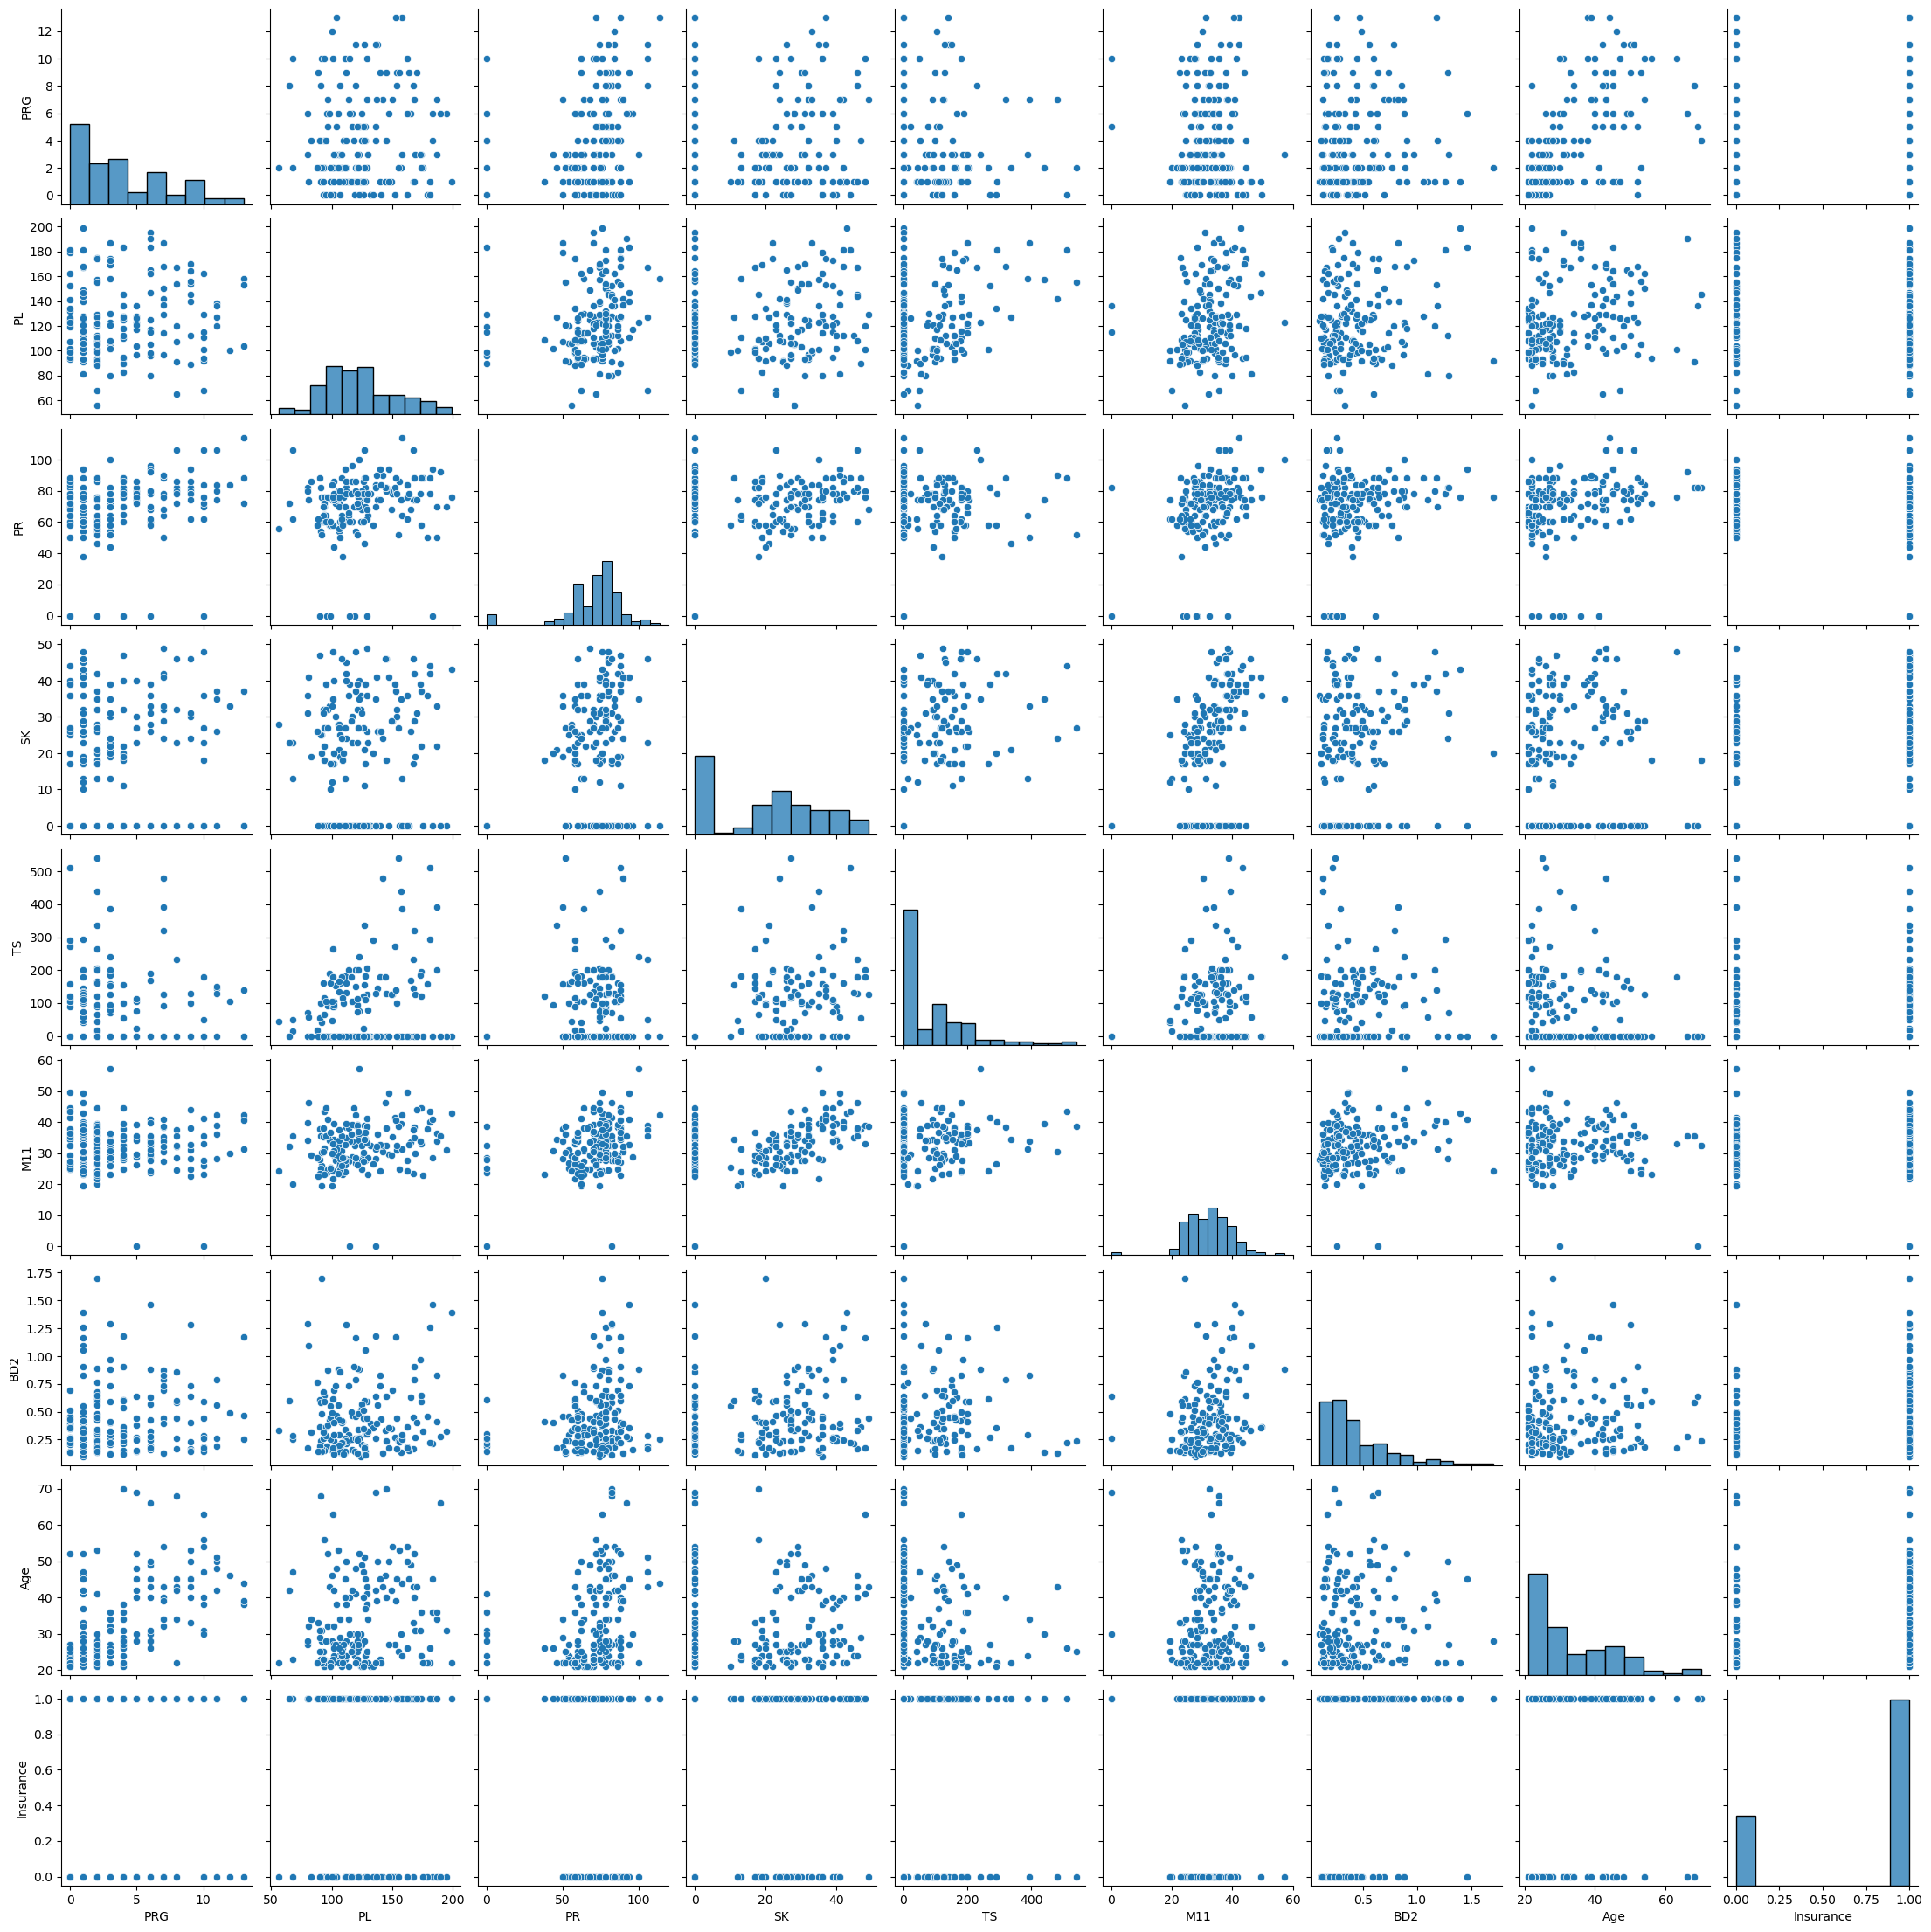

In [14]:
sns.pairplot(patients_test)

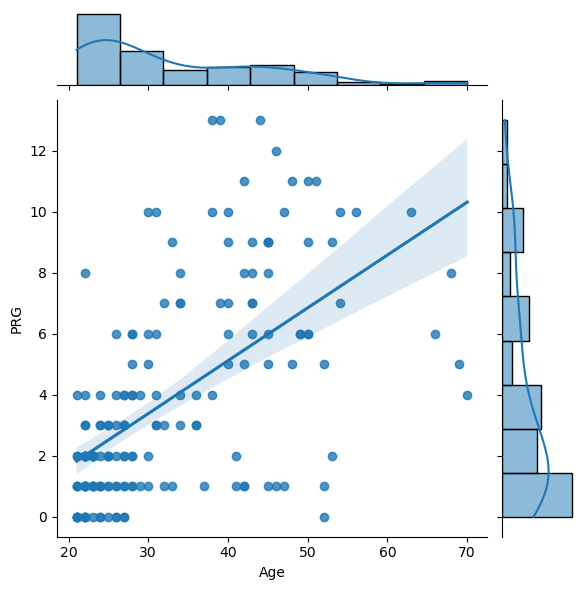

In [15]:
sns.jointplot(x='Age', y='PRG', data=patients_test, kind='reg');

In [17]:
patients_test.corr().loc['PRG'].abs().sort_values(ascending=False)

PRG          1.000000
Age          0.587779
PR           0.226032
TS           0.143327
PL           0.088808
SK           0.084315
M11          0.042980
BD2          0.041405
Insurance    0.000742
Name: PRG, dtype: float64

In [80]:
patients_train= patients_train.drop(columns=['Sepssis', 'ID'])


In [81]:
patients_train.columns

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')

# Decision tree

In [82]:
#define X and y
X=patients_train.drop('PRG', axis=1)
y=patients_train['PRG']

#transform the insurance column
X_insurance = patients_train[['Insurance']]

# Create an instance of the OneHotEncoder class
onehot_encoder = OneHotEncoder()

# Fit and transform the 'Insurance' column
X_insurance_encoded = onehot_encoder.fit_transform(X_insurance)

# Convert the encoded data to a DataFrame
X_insurance_encoded_df = pd.DataFrame(X_insurance_encoded.toarray(), columns=onehot_encoder.get_feature_names(['Insurance']))

# # # Replace the original 'Insurance' column with the encoded one
patients_train= patients_train.drop('Insurance', axis=1)
patients_train['no Insurance']=X_insurance_encoded_df['Insurance_0']
patients_train['have Insurance']=X_insurance_encoded_df['Insurance_1']
patients_train


,PRG,PL,PR,SK,TS,M11,BD2,Age,no Insurance,have Insurance
0,6,148,72,35,0,33.6,0.627,50,1.0,0.0
1,1,85,66,29,0,26.6,0.351,31,1.0,0.0
2,8,183,64,0,0,23.3,0.672,32,0.0,1.0
3,1,89,66,23,94,28.1,0.167,21,0.0,1.0
4,0,137,40,35,168,43.1,2.288,33,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,1.0,0.0
595,0,188,82,14,185,32.0,0.682,22,0.0,1.0
596,0,67,76,0,0,45.3,0.194,46,0.0,1.0
597,1,89,24,19,25,27.8,0.559,21,1.0,0.0


In [83]:
model = DecisionTreeRegressor(min_samples_leaf=10, 
                              ccp_alpha=0.01, 
                              max_leaf_nodes=20,
                              max_depth=4)
model.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.01, max_depth=4, max_leaf_nodes=20,
                      min_samples_leaf=10)

In [85]:
export_graphviz(model)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="X[6] <= 31.5\\nsquared_error = 11.29\\nsamples = 599\\nvalue = 3.825"] ;\n1 [label="X[6] <= 26.5\\nsquared_error = 3.505\\nsamples = 342\\nvalue = 2.079"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[4] <= 36.05\\nsquared_error = 2.064\\nsamples = 233\\nvalue = 1.575"] ;\n1 -> 2 ;\n3 [label="X[6] <= 22.5\\nsquared_error = 2.098\\nsamples = 179\\nvalue = 1.771"] ;\n2 -> 3 ;\n4 [label="squared_error = 1.136\\nsamples = 91\\nvalue = 1.308"] ;\n3 -> 4 ;\n5 [label="squared_error = 2.642\\nsamples = 88\\nvalue = 2.25"] ;\n3 -> 5 ;\n6 [label="X[2] <= 25.5\\nsquared_error = 1.402\\nsamples = 54\\nvalue = 0.926"] ;\n2 -> 6 ;\n7 [label="squared_error = 2.694\\nsamples = 11\\nvalue = 1.818"] ;\n6 -> 7 ;\n8 [label="squared_error = 0.816\\nsamples = 43\\nvalue = 0.698"] ;\n6 -> 8 ;\n9 [label="X[5] <= 0.55\\nsquared_error = 4.884\\nsamples = 109\\nvalue = 3.156"] ;\n1 

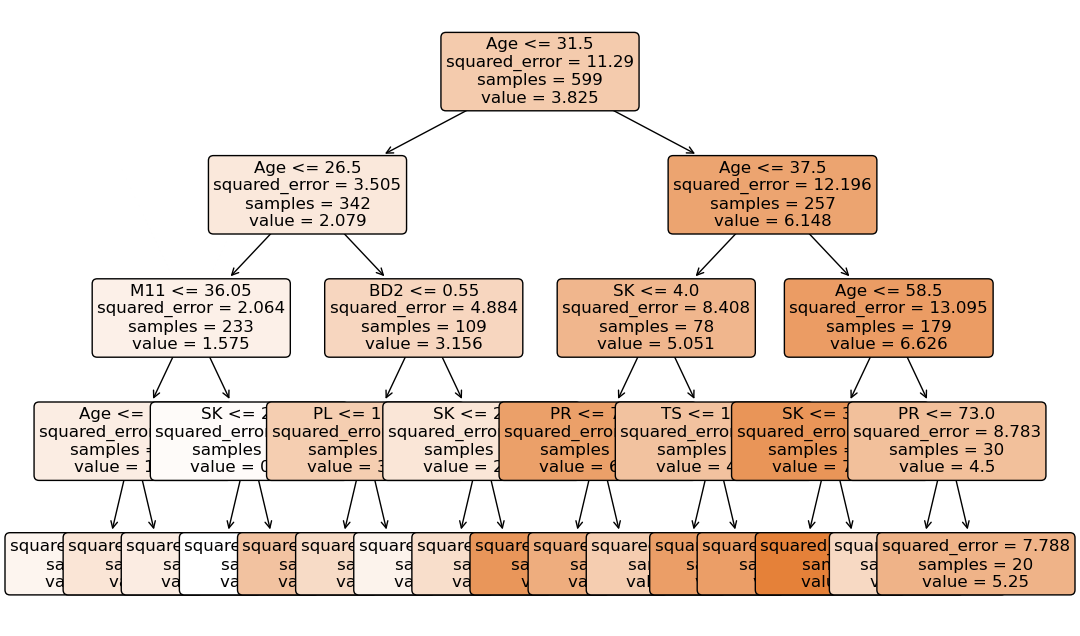

In [86]:
def visualize_tree(model, md=5, fs=(12, 8)):
    plt.figure(figsize=fs)
    plot_tree(model,
            max_depth=md,
            feature_names=model.feature_names_in_,
            label='all',
            filled=True,
            rounded=True, 
            fontsize=12);
visualize_tree(model, md=7)

In [87]:
#prediction
y_pred = model.predict(X)